    # def tickOptionComputation(self, reqId, tickType, tickAttrib, impliedVol, delta, 
    #                           optPrice, pvDividend, gamma, vega, theta, undPrice):
    #     print(reqId)
    #     print(gamma)
    #     greeks_data = {
    #         'reqId': reqId,
    #         'tickType': tickType,
    #         'impliedVol': impliedVol if impliedVol < 1e308 else None,
    #         'delta': delta if delta < 1e308 else None,
    #         'gamma': gamma if gamma < 1e308 else None,
    #         'vega': vega if vega < 1e308 else None,
    #         'theta': theta if theta < 1e308 else None,
    #         'undPrice': undPrice if undPrice < 1e308 else None
    #     }
    #     self.greeks_cache[reqId] = greeks_data
    #     print(greeks_data)
    #     return greeks_data
        



# def get_portfolio(account_id, host="127.0.0.1", port=7497, client_id=0, wait_time=10):
#     """
#     Get portfolio data for a specific account ID.
    
#     Parameters:
#     -----------
#     account_id : str
#         The account ID to retrieve portfolio data for (e.g., "U9267744")
#     host : str
#         TWS/Gateway host address (default: "127.0.0.1")
#     port : int
#         TWS/Gateway port (default: 7497 for live, 7496 for paper)
#     client_id : int
#         Unique client ID for this connection (default: 0)
#     wait_time : int
#         Time in seconds to wait for data collection (default: 10)
    
#     Returns:
#     --------
#     tuple: (positions, account_values)
#         positions: list of position dictionaries
#         account_values: list of account value dictionaries
#     """
#     app = IBApp(account_id)
#     app.connect(host, port, clientId=client_id)
    
#     # Run API in separate thread

    
#     # Display portfolio data
#     # print("\n=== PORTFOLIO POSITIONS ===")
#     # for pos in app.positions:
#     #     print(f"{pos['symbol']}: {pos['position']} shares @ ${pos['avgCost']:.2f}")
#     #     print(f"  Market Value: ${pos['marketValue']:.2f}, P&L: ${pos['unrealizedPNL']:.2f}\n")
    
#     # # Display key account values
#     # print("=== ACCOUNT SUMMARY ===")
#     # for val in app.account_values:
#     #     if val['key'] == 'NetLiquidation':
#     #         print(f"Net Liquidation: ${val['value']} {val['currency']}")
    

#     # time.sleep(1)
    
#     # return app.positions, app.account_values


# # Usage examples:

#     # Example 1: Get portfolio for a specific account

# positions, account_values = get_portfolio("U9267744")
    
#     # Example 2: Get portfolio for paper trading account
#     # positions, account_values = get_portfolio("DU1234567", port=7496)
    
#     # Example 3: Access the data programmatically
#     # for pos in positions:
#     #     print(f"Holding {pos['position']} shares of {pos['symbol']}")


In [1]:
from ib_download import *

In [2]:

from datetime import datetime
import pandas as pd
import time
import pickle
import os

from option_data.main import *
FOC_stock = FOC(asset_type='stocks')
FOC_etf = FOC(asset_type='etf')
pc_mapping={'P':'PUT','C':'CALL'}

In [3]:
account_id="U9267744"
host="127.0.0.1"
port=7497
client_id=0
wait_time=1
app = IBApp(account_id)
app.connect(host, port, clientId=client_id)
api_thread = Thread(target=app.run, daemon=True)
api_thread.start()

# Wait for data collection
time.sleep(wait_time)
# Stop subscription for the specific account
app.stop(account_id)

Requesting portfolio for account: U9267744
Available accounts: ['U11312965', 'U19438876', 'U9267744', '']
Error: -1, 2104, Market data farm connection is OK:hfarm
Error: -1, 2104, Market data farm connection is OK:eufarmnj
Error: -1, 2104, Market data farm connection is OK:cashfarm
Error: -1, 2104, Market data farm connection is OK:usfuture
Error: -1, 2104, Market data farm connection is OK:usfarm.nj
Error: -1, 2104, Market data farm connection is OK:jfarm
Error: -1, 2104, Market data farm connection is OK:eufarm
Error: -1, 2104, Market data farm connection is OK:usfarm
Error: -1, 2104, Market data farm connection is OK:usopt
Error: -1, 2106, HMDS data farm connection is OK:euhmds
Error: -1, 2106, HMDS data farm connection is OK:fundfarm
Error: -1, 2106, HMDS data farm connection is OK:ushmds
Error: -1, 2158, Sec-def data farm connection is OK:secdefeu
Portfolio Update - Account: U9267744
  Symbol: 1211, SecType: OPT
  Position: -1.0, Market Value: $-349.77
  Avg Cost: $364.0, Unrealiz

In [4]:
app.cash_balance

{'All': {'CHF': -6.07,
  'HKD': 1925.56,
  'RUS': 17096.47,
  'GBP': 3500.42,
  'USD': 125379.797,
  'RUB': 0.0,
  'BASE': 99288.7368}}

from ib_insync import *
import nest_asyncio
nest_asyncio.apply()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=2)

# Define option contract
option = Option('AAPL', '20251121', 220, 'P', 'SMART')
ib.qualifyContracts(option)

# Request market data
ticker = ib.reqMktData(option)
ib.sleep(2)  # Wait for data to populate

# Access Greeks
print(ticker.bidGreeks)    # Greeks for bid price
print(ticker.askGreeks)    # Greeks for ask price  
print(ticker.lastGreeks)   # Greeks for last price
print(ticker.modelGreeks)  # IB's model Greeks


{app.positions[k]['contract'].secType for k in range(20)}

In [79]:
app.positions#[1]

[{'account': 'U9267744',
  'contract': 5359518224: 804725134,1211,OPT,20251127,90.0,P,500,,SEHK,HKD,BYD NOV25 90 P,BYD,False,,combo:,
  'position': -1.0,
  'marketPrice': 0.69954185,
  'marketValue': -349.77,
  'avgCost': 364.0,
  'unrealizedPNL': 14.23,
  'realizedPNL': 0.0},
 {'account': 'U9267744',
  'contract': 5361221584: 254777977,798,STK,,0.0,0,,,SEHK,HKD,798,798,False,,combo:,
  'position': 12000.0,
  'marketPrice': 0.242306,
  'marketValue': 2907.67,
  'avgCost': 0.3107555,
  'unrealizedPNL': -821.39,
  'realizedPNL': 0.0},
 {'account': 'U9267744',
  'contract': 5358094288: 768540114,836,OPT,20251230,17.0,P,2000,,SEHK,HKD,CRP DEC25 17 P,CRP,False,,combo:,
  'position': -1.0,
  'marketPrice': 0.03996775,
  'marketValue': -79.94,
  'avgCost': 579.0,
  'unrealizedPNL': 499.06,
  'realizedPNL': 0.0},
 {'account': 'U9267744',
  'contract': 5360733392: 783584628,AAPL,OPT,20251121,200.0,P,100,,AMEX,USD,AAPL  251121P00200000,AAPL,False,,combo:,
  'position': -1.0,
  'marketPrice': 0.0

In [48]:
stocks_net=dict()

for pos in app.positions:
    contract=pos['contract']
    if (contract.secType=='STK') and (contract.primaryExchange=='NYSE'):
        #print(contract.primaryExchange)
        symbol=pos['contract'].symbol.rstrip('0123456789')
        stocks_net[symbol]=pos['position']
stocks_net=pd.Series(stocks_net)

contract_symbol = ref_FOC.get_contract_symbol(contract.symbol, datetime.strptime(contract.lastTradeDateOrContractMonth, '%Y%m%d').strftime('%Y-%m-%d'), pc_mapping[contract.right], contract.strike)
single_option_data = ref_FOC.get_options_price_data(contract_symbol)
ref_FOC.get_options_price_data('TLT--251031P00083000')

In [6]:
#app.positions[1].secType
print(str(len(app.positions))+' positions in total')
option_df=dict()
stocks_under=set(stocks_net.index).copy()

for pos in app.positions:
    contract=pos['contract']
    if (contract.secType=='OPT') and (contract.primaryExchange=='AMEX'):
        symbol=pos['contract'].symbol.rstrip('0123456789')
        stocks_under.add(symbol)
        contract_symbol =FOC_stock.get_contract_symbol(symbol, datetime.strptime(contract.lastTradeDateOrContractMonth, '%Y%m%d').strftime('%Y-%m-%d'), pc_mapping[contract.right], contract.strike)
        print(contract_symbol)
        time.sleep(0.01)
        try:
            single_option_data = FOC_stock.get_options_price_data(contract_symbol)
        except ValueError as e:
            single_option_data = FOC_etf.get_options_price_data(contract_symbol)
            # print(str(e))
            # if str(e) == "ValueError: Invalid json keys.":
            #     single_option_data = FOC_etf.get_options_price_data(contract_symbol)
            # else:
            #     raise
    #     try:
    # # Code that may raise ValueError: Invalid json keys
    #         single_option_data = FOC_stock.get_options_price_data(contract_symbol)
    #     except ValueError as e:
    #         if str(e) == "Invalid json keys":
    #             single_option_data = FOC_etf.get_options_price_data(contract_symbol)
    #     else:
    #     # Re-raise other ValueErrors that are not this specific case
    #         raise ValueError
        
        seri=single_option_data.iloc[0,:].copy()
        seri.loc['symbol']=symbol
        seri.loc['position']=pos['position']
        option_df[single_option_data.index.name]=seri
        pos['live_data']=seri
                #tot[pos['contract'].symbol]=pos['marketValue']
option_df=pd.DataFrame(option_df).T

134 positions in total
AAPL--251121P00200000
AAPL--251121C00300000
AAPL--251128P00230000
ACN---251114P00225000
ACN---251121P00190000
ADBE--251114P00300000
AVGO--251107P00315000
AVGO--251114P00250000
AVGO--251121C00460000
AZN---251121P00075000
BIDU--251107P00100000
BIDU--251121P00090000
BMY---251107P00039000
CCL---251128P00026000
CCL---251219P00022000
CL----251121P00073000
CMG---251121C00036500
CNI---251121P00090000
CRM---251121P00180000
CRWV--251107P00085000
CRWV--251107C00160000
CRWV--251114P00085000
CVX---251121P00135000
DAL---251107P00054000
DAL---251107C00068000
DEO---251121C00100000
DOW---251114P00022500
DOW---251121P00021500
DOW---251219P00020000
F-----251219P00009850
GIS---251121P00045000
GOOGL-251114P00255000
GOOGL-251114C00305000
GOOGL-251121P00140000
GOOGL-251121C00335000
GOOGL-251219P00175000
HON---251121P00190000
ICE---251121P00135000
JD----251107P00030000
JD----251114P00029000
JD----251121P00030000
KDP---251121P00026000
KHC---251121P00024000
KHC---251219P00022500
KO----251

In [49]:

# Ensure the folder exists
os.makedirs("temp", exist_ok=True)

# --- SAVE (Pickle dump) ---
with open("temp/option_df.pkl", "wb") as f:
    pickle.dump(option_df, f)

with open("temp/stocks_under.pkl", "wb") as f:
    pickle.dump(stocks_under, f)
    


with open("temp/stocks_net.pkl", "wb") as f:
    pickle.dump(stocks_net, f)
    
print("✅ Saved option_df and stocks_under to 'temp/'")


✅ Saved option_df and stocks_under to 'temp/'


In [4]:

# --- LOAD (Pickle load) ---
with open("temp/option_df.pkl", "rb") as f:
    option_df=pickle.load(f)

with open("temp/stocks_under.pkl", "rb") as f:
    stocks_under = pickle.load(f)


with open("temp/stocks_net.pkl", "rb") as f:
    stocks_net = pickle.load(f)

print("✅ Loaded option_df and stocks_under from 'temp/'")


✅ Loaded option_df and stocks_under from 'temp/'


In [5]:
stocks_metadata=dict()
for k in stocks_under:
    stock_system = StockMetadataSystem(k)
    # Get all metadata
    all_metadata = stock_system.get_all_metadata()
    # Display key metrics
    #stock_system.display_key_metrics()
    # Save to file
    stock_system.save_metadata_to_file()
    stocks_metadata[k]=all_metadata

✓ Metadata saved to metadata/DOW_metadata.json
✓ Metadata saved to metadata/PATH_metadata.json
✓ Metadata saved to metadata/AVGO_metadata.json
✓ Metadata saved to metadata/DEO_metadata.json
✓ Metadata saved to metadata/KDP_metadata.json
✓ Metadata saved to metadata/HON_metadata.json
✓ Metadata saved to metadata/LMT_metadata.json
✓ Metadata saved to metadata/RIO_metadata.json
✓ Metadata saved to metadata/PLTR_metadata.json
✓ Metadata saved to metadata/CMG_metadata.json
✓ Metadata saved to metadata/QCOM_metadata.json
✓ Metadata saved to metadata/XLE_metadata.json
✓ Metadata saved to metadata/TXN_metadata.json
✓ Metadata saved to metadata/O_metadata.json
✓ Metadata saved to metadata/NEE_metadata.json
✓ Metadata saved to metadata/CNI_metadata.json
✓ Metadata saved to metadata/F_metadata.json
✓ Metadata saved to metadata/OXY_metadata.json
✓ Metadata saved to metadata/XOM_metadata.json
✓ Metadata saved to metadata/AAPL_metadata.json
✓ Metadata saved to metadata/MTCH_metadata.json
✓ Metadata 

In [6]:
for k,v in stocks_metadata.items():
    if v['basic_info']['quoteType'] != 'EQUITY':
        print(k)

XLE
TLT
TSLL


In [7]:
designation=pd.Series({'XLE':'Energy','TSLL':'Technology','TLT':'Government'})

In [9]:
of_interest='sector'
meta_data ={
    k: v['basic_info'][of_interest]
    
    #else v['basic_info']['category']
    for k, v in stocks_metadata.items()
    if v['basic_info']['quoteType'] == 'EQUITY'
}
meta_data.update(designation)
meta_data=pd.Series(meta_data,name=of_interest)


In [15]:
meta_data.sort_values()#.value_counts()

DOW             Basic Materials
VALE            Basic Materials
RIO             Basic Materials
BIDU     Communication Services
VZ       Communication Services
GOOGL    Communication Services
MTCH     Communication Services
MCD           Consumer Cyclical
CCL           Consumer Cyclical
NKE           Consumer Cyclical
F             Consumer Cyclical
JD            Consumer Cyclical
CMG           Consumer Cyclical
DEO          Consumer Defensive
KHC          Consumer Defensive
PG           Consumer Defensive
KDP          Consumer Defensive
GIS          Consumer Defensive
KVUE         Consumer Defensive
PEP          Consumer Defensive
TGT          Consumer Defensive
MDLZ         Consumer Defensive
CL           Consumer Defensive
KO           Consumer Defensive
XOM                      Energy
OXY                      Energy
XLE                      Energy
CVX                      Energy
ICE          Financial Services
PYPL         Financial Services
TLT                  Government
PFE     

In [11]:
stock_live_price=yfinance_quick_live_prices(stocks_under)
stock_live_price=pd.Series(stock_live_price)

DOW
PATH
AVGO
DEO
KDP
HON
LMT
RIO
PLTR
CMG
QCOM
XLE
TXN
O
NEE
CNI
F
OXY
XOM
AAPL
MTCH
TLT
GOOGL
TGT
PEP
NKE
NVDA
CCL
PG
KHC
CVX
JD
ORCL
KO
PFE
UNH
MCD
VALE
GIS
ADBE
OPEN
UNP
TSLL
VZ
KVUE
MDLZ
BMY
CRM
ACN
UPS
CRWV
ICE
CL
PYPL
DAL
NVO
BIDU
ZTS
AZN
MRK


In [9]:
option_df.head(60)

label,Last Sale,Net,Day High,Day Low,Volume,Prev Close,Open,Open Interest,Tick,Bid,...,Delta,Gamma,Rho,Theta,Vega,Impvol,timestamp,contract_symbol,symbol,position
AAPL--251121P00200000,0.06,0.01,0.06,0.05,196,0.05,0.05,15902,1,0.05,...,-0.00521,0.00047,-0.00072,-0.01325,0.00896,0.53707,2025-11-03 17:57:00,AAPL--251121P00200000,AAPL,-1.0
AAPL--251121C00300000,0.16,-0.17,0.3,0.15,1780,0.33,0.27,11880,,0.15,...,0.02776,0.00430,0.00360,-0.02701,0.03810,0.24865,2025-11-03 17:57:00,AAPL--251121C00300000,AAPL,-1.0
AAPL--251128P00230000,0.28,-0.01,0.34,0.26,42,0.29,0.26,366,1,0.24,...,-0.03044,0.00294,-0.00580,-0.03144,0.04848,0.33224,2025-11-03 17:57:00,AAPL--251128P00230000,AAPL,-1.0
ACN---251114P00225000,0.4,-,0.55,0.4,12,0.4,0.52,442,,N/A,...,-0.05717,0.00718,-0.00440,-0.08282,0.04945,0.37054,2025-11-03 17:57:00,ACN---251114P00225000,ACN,-1.0
ACN---251121P00190000,0.12,-,N/A,N/A,0,0.12,N/A,777,,N/A,...,-0.04439,0.00227,-0.00583,-0.10702,0.05171,0.74798,2025-11-03 17:57:00,ACN---251121P00190000,ACN,-1.0
ADBE--251114P00300000,0.47,-0.05,0.8,0.34,27,0.52,0.8,113,,0.28,...,-0.04770,0.00404,-0.00500,-0.10931,0.05819,0.41970,2025-11-03 17:57:00,ADBE--251114P00300000,ADBE,-1.0
AVGO--251107P00315000,0.41,0.07,0.42,0.25,766,0.34,0.26,2356,1,0.3,...,-0.03248,0.00257,-0.00133,-0.25608,0.02757,0.74557,2025-11-03 17:57:00,AVGO--251107P00315000,AVGO,-1.0
AVGO--251114P00250000,0.05,0.03,0.05,0.02,9,0.02,0.03,63,1,0.04,...,-0.00287,0.00018,-0.00033,-0.01994,0.00553,0.79714,2025-11-03 17:57:00,AVGO--251114P00250000,AVGO,-1.0
AVGO--251121C00460000,0.39,-0.43,0.57,0.39,51,0.82,0.57,2033,-1,0.22,...,0.02297,0.00130,0.00394,-0.06384,0.04382,0.51874,2025-11-03 17:57:00,AVGO--251121C00460000,AVGO,-1.0
AZN---251121P00075000,0.37,0.06,0.37,0.31,12,0.31,0.35,571,1,0.3,...,-0.11419,0.03167,-0.00477,-0.03203,0.03504,0.33600,2025-11-03 17:57:00,AZN---251121P00075000,AZN,-1.0


In [52]:
stock_underly_sum_delta['GOOGL']

-0.07172

In [53]:
(stock_underly_sum_delta * stock_live_price * 100)['TSLL']

-2138.93664

/var/folders/_q/zvg1j91x7sx_8_rt3f62v0ph0000gn/T/ipykernel_4661/1196901440.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n_categories)


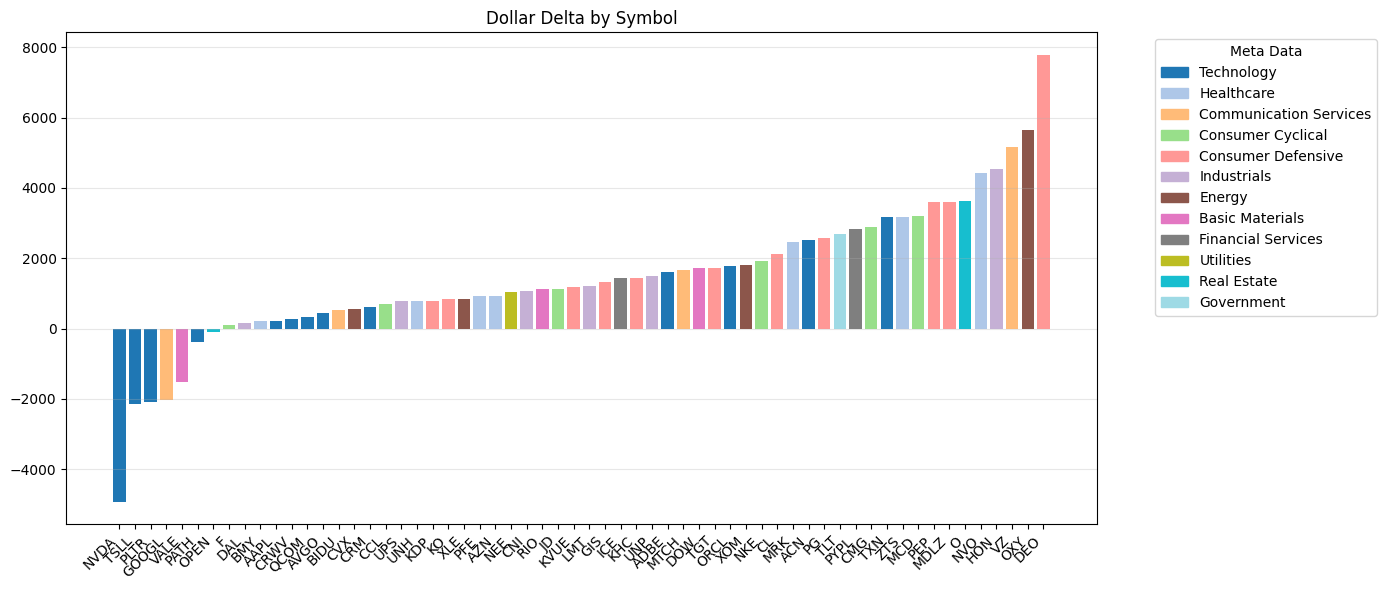

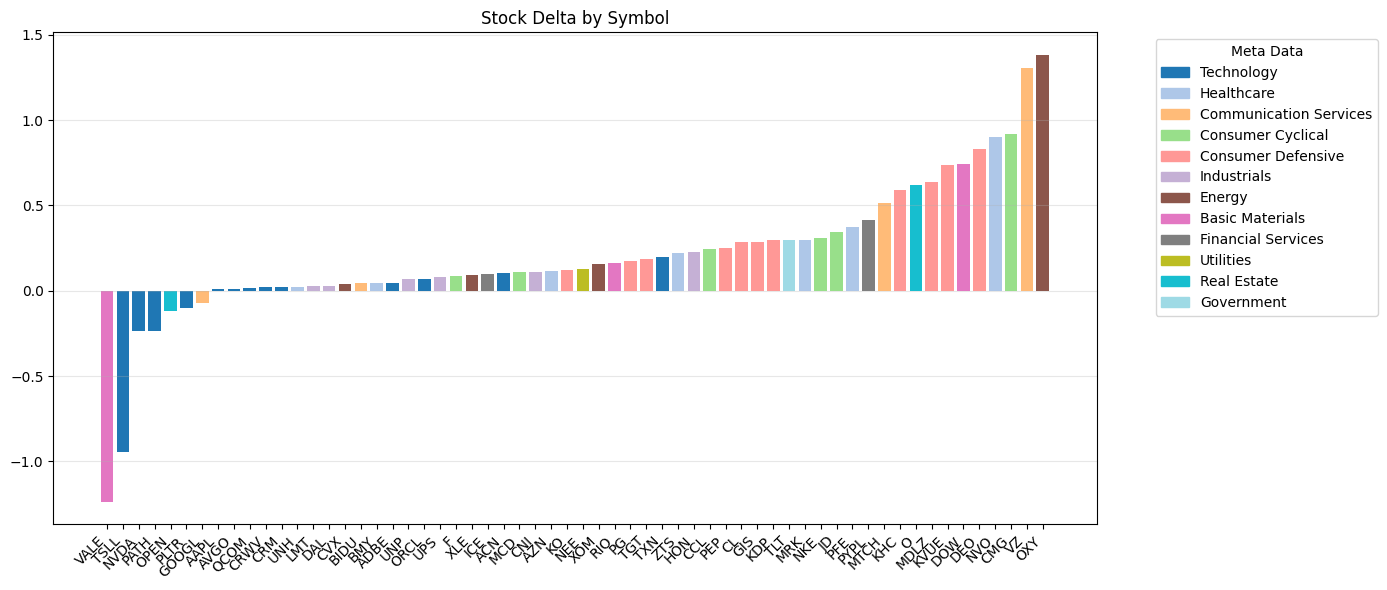

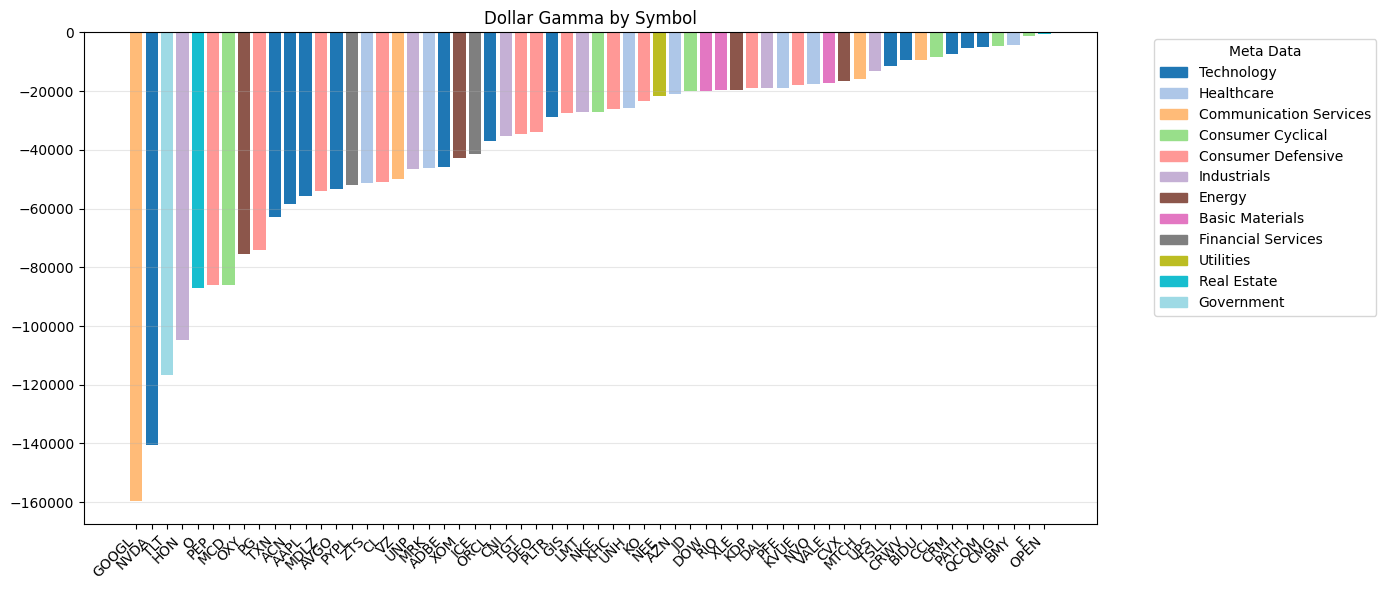

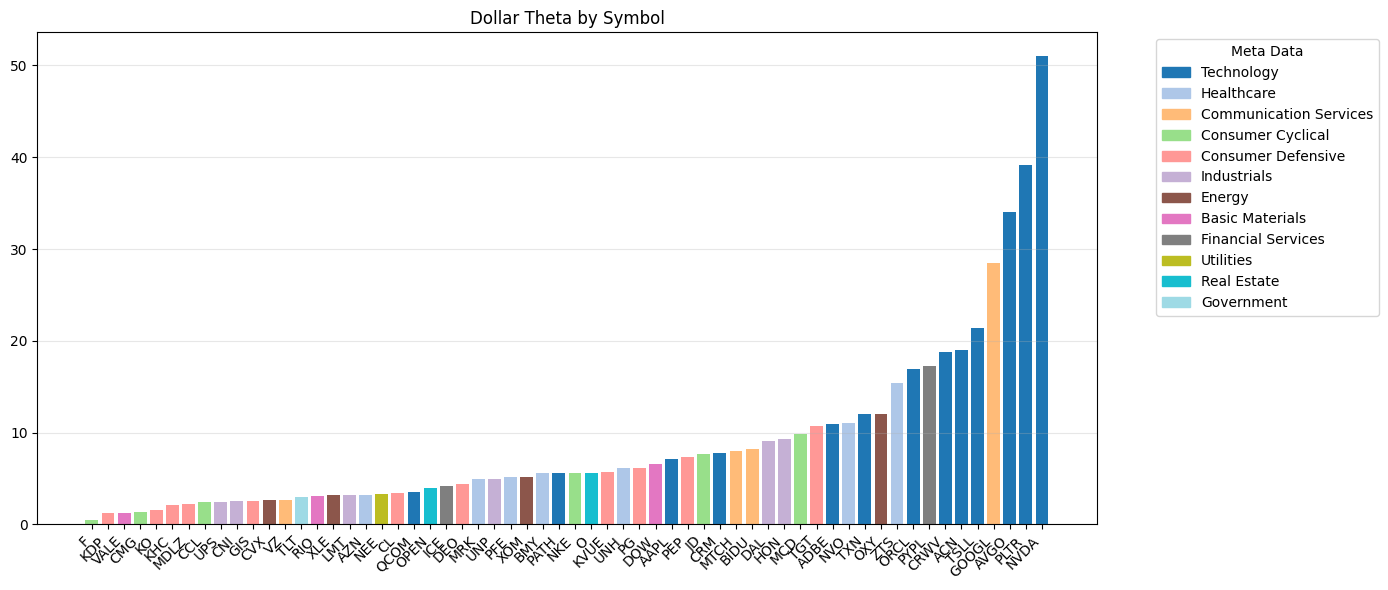


Greeks Summary:
       delta  gamma  theta               meta_data   price
AAPL    0.01  -0.01   0.07              Technology  269.05
ACN     0.10  -0.01   0.19              Technology  248.44
ADBE    0.05  -0.00   0.11              Technology  337.47
AVGO    0.01  -0.00   0.34              Technology  362.55
AZN     0.11  -0.03   0.03              Healthcare   81.72
BIDU    0.04  -0.01   0.08  Communication Services  121.23
BMY     0.05  -0.02   0.06              Healthcare   46.02
CCL     0.24  -0.10   0.02       Consumer Cyclical   28.71
CL      0.28  -0.09   0.03      Consumer Defensive   74.98
CMG     0.92  -0.05   0.01       Consumer Cyclical   31.51
CNI     0.11  -0.04   0.03             Industrials   95.62
CRM     0.02  -0.00   0.08              Technology  261.34
CRWV    0.02  -0.01   0.19              Technology  126.32
CVX     0.04  -0.01   0.03                  Energy  154.04
DAL     0.03  -0.06   0.09             Industrials   58.50
DEO     0.83  -0.04   0.04      Consume

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def aggregate_greek(df, deriv='Delta'):
    """Aggregate Greek exposure by symbol"""
    df['product'] = df[deriv].astype(float) * df['position'].astype(float)
    return df.groupby('symbol')['product'].sum()

# Calculate all Greeks and organize into a single dataframe
greeks_df = pd.DataFrame({
    'delta': aggregate_greek(option_df, 'Delta'),
    'gamma': aggregate_greek(option_df, 'Gamma'),
    'theta': aggregate_greek(option_df, 'Theta'),
    'meta_data': meta_data
})

# Add stock positions (normalized to 100-share lots)
greeks_df['delta'] = greeks_df['delta'].add(stocks_net / 100, fill_value=0)

# Merge in live prices
greeks_df = greeks_df.join(stock_live_price.rename('price'), how='left')

# Calculate dollar-denominated exposures
dollar_exposures = pd.DataFrame({
    'dollar_delta': greeks_df['delta'] * greeks_df['price'] * 100,
    'stock_delta': greeks_df['delta'],
    'dollar_gamma': greeks_df['gamma'] * (greeks_df['price'] ** 2) * 100,
    'dollar_theta': greeks_df['theta'] * 100,
    'meta_data': meta_data
}, index=greeks_df.index)


# Create color mapping with guaranteed unique colors
unique_categories = dollar_exposures['meta_data'].unique()
n_categories = len(unique_categories)

# Use tab20 for up to 20 categories, or generate custom colors for more
if n_categories <= 10:
    cmap = plt.cm.get_cmap('tab10', n_categories)
elif n_categories <= 20:
    cmap = plt.cm.get_cmap('tab20', n_categories)
else:
    # Generate distinct colors using HSV color space for many categories
    colors = plt.cm.hsv(np.linspace(0, 0.9, n_categories))
    cmap = lambda i: colors[i]

color_map = {cat: cmap(i) for i, cat in enumerate(unique_categories)}


def plot_with_colors(data_column, title):
    """Helper function to create bar plots with color coding"""
    sorted_data = dollar_exposures[[data_column, 'meta_data']].sort_values(by=data_column)
    colors = [color_map[cat] for cat in sorted_data['meta_data']]
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(range(len(sorted_data)), sorted_data[data_column], color=colors)
    ax.set_xticks(range(len(sorted_data)))
    ax.set_xticklabels(sorted_data.index, rotation=45, ha='right')
    ax.set_title(title)
    ax.grid(axis='y', alpha=0.3)
    
    # Add legend outside the plot area
    handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in unique_categories]
    ax.legend(handles, unique_categories, title='Meta Data', 
              bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()


# Create separate plots with color coding (by symbol)
plot_with_colors('dollar_delta', 'Dollar Delta by Symbol')
plot_with_colors('stock_delta', 'Stock Delta by Symbol')
plot_with_colors('dollar_gamma', 'Dollar Gamma by Symbol')
plot_with_colors('dollar_theta', 'Dollar Theta by Symbol')




plt.show()

# Display summary statistics
print("\nGreeks Summary:")
print(greeks_df.round(2))
print("\nDollar Exposures Summary:")
print(dollar_exposures.round(2))
print("\nAggregated by Metadata:")
print(aggregated_by_metadata.round(2))


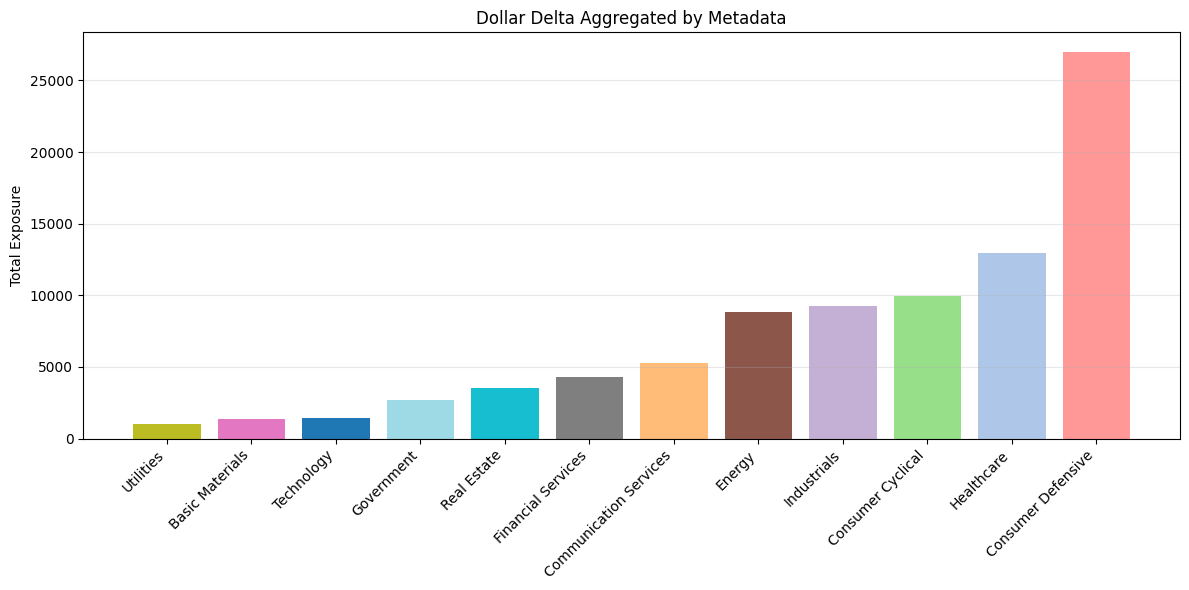

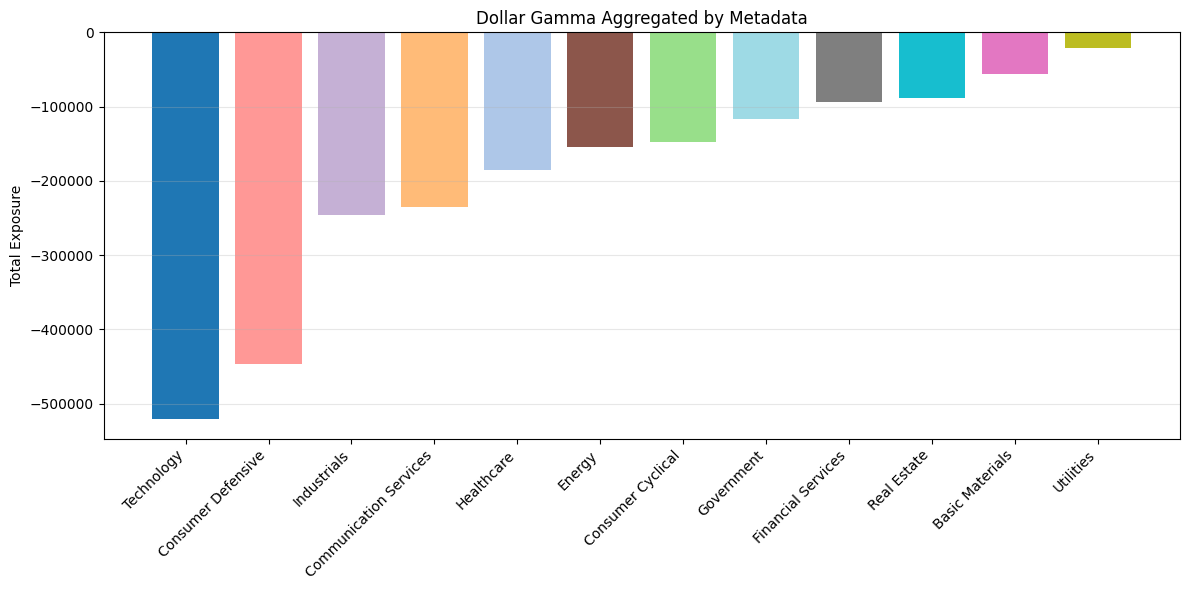

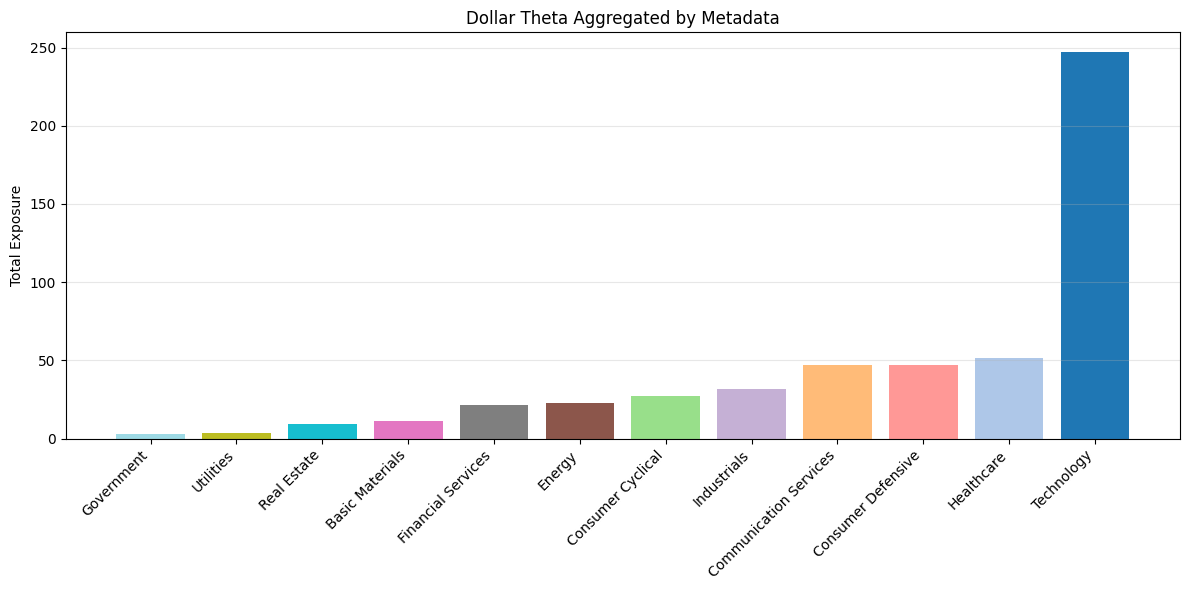

In [14]:
# Create aggregated dataframe by metadata
aggregated_by_metadata = dollar_exposures.groupby('meta_data').agg({
    'dollar_delta': 'sum',
    'dollar_gamma': 'sum',
    'dollar_theta': 'sum'
})

def plot_aggregated(data_column, title):
    """Helper function to create aggregated bar plots by metadata"""
    sorted_data = aggregated_by_metadata[[data_column]].sort_values(by=data_column)
    colors = [color_map[cat] for cat in sorted_data.index]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(range(len(sorted_data)), sorted_data[data_column], color=colors)
    ax.set_xticks(range(len(sorted_data)))
    ax.set_xticklabels(sorted_data.index, rotation=45, ha='right')
    ax.set_title(title)
    ax.set_ylabel('Total Exposure')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
# Create aggregated plots (by metadata)
plot_aggregated('dollar_delta', 'Dollar Delta Aggregated by Metadata')
plot_aggregated('dollar_gamma', 'Dollar Gamma Aggregated by Metadata')
plot_aggregated('dollar_theta', 'Dollar Theta Aggregated by Metadata')

plt.show()

In [15]:
options_with_greeks

,expirygroup,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,c_colour,strike,drillDownURL,tickersymbol,recordID,c_Delta,c_Gamma,c_Rho,c_Theta,c_Vega,c_Impvol
0,,0.00,0.00,139.50,142.15,0,0,True,100.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00100000,0.99928,0.00004,0.00330,-0.07884,0.00034,5.00000
1,,0.00,0.00,134.50,137.15,0,0,True,105.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00105000,0.99872,0.00006,0.00346,-0.12831,0.00058,5.00000
2,,0.00,0.00,129.50,132.15,0,0,True,110.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00110000,0.99785,0.00010,0.00362,-0.20159,0.00093,5.00000
3,,0.00,0.00,124.40,127.15,0,0,True,115.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00115000,0.99655,0.00015,0.00377,-0.30538,0.00143,5.00000
4,,0.00,0.00,119.50,122.15,0,0,True,120.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00120000,0.99467,0.00022,0.00392,-0.44662,0.00211,5.00000
5,,0.00,0.00,114.50,117.15,0,0,True,125.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00125000,0.99207,0.00031,0.00406,-0.63162,0.00300,5.00000
6,,0.00,0.00,109.50,112.15,0,0,True,130.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00130000,0.98857,0.00043,0.00420,-0.86612,0.00413,5.00000
7,,106.70,0.00,104.25,107.15,0,25,True,135.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00135000,0.98401,0.00058,0.00432,-1.15443,0.00552,5.00000
8,,107.39,0.00,99.45,102.15,0,3,True,140.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00140000,0.97822,0.00075,0.00443,-1.49916,0.00718,5.00000
9,,89.50,0.00,94.40,97.15,0,3,True,145.0,/market-activity/stocks/googl/option-chain/cal...,GOOGL,googl-251010c00145000,0.97253,0.00093,0.00455,-1.79368,0.00872,4.92937


In [18]:
contract_symbol = ref_FOC.get_contract_symbol("GOOGL", "2025-10-10", "CALL", 242.5)
single_option_data = ref_FOC.get_options_price_data(contract_symbol)

In [20]:
single_option_data.iloc[0,:]

label
Last Sale                            1.2
Net                                -2.45
Day High                            3.55
Day Low                             1.13
Volume                              6889
Prev Close                          3.65
Open                                3.29
Open Interest                       1206
Tick                                   1
Bid                                 1.19
Ask                                 1.21
Bid Size                              30
Ask Size                              54
Contract High                       14.8
Contract Low                        3.45
Market                             OPRAC
Delta                            0.33815
Gamma                            0.06756
Rho                              0.00264
Theta                           -0.82860
Vega                             0.05046
Impvol                           0.39220
timestamp            2025-10-09 11:04:00
contract_symbol    GOOGL-251010C00242500
Name: valu

In [8]:
import yfinance as yf
import pandas as pd

# List of tickers to check (expand as needed)
tickers = ['SPY', 'TSLA', 'NVDA', 'AAPL', 'MSFT']

data = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    options = stock.option_chain('2025-11-21')  # Gets current chain; for OI, aggregate across expirations
    # Note: yfinance provides chain data; for full OI, sum calls and puts
    calls_oi = options.calls['openInterest'].sum()
    puts_oi = options.puts['openInterest'].sum()
    total_oi = calls_oi + puts_oi
    data.append({'Ticker': ticker, 'Total OI': total_oi})

df = pd.DataFrame(data).sort_values('Total OI', ascending=False)
print(df)

  Ticker  Total OI
0    SPY   1917235
2   NVDA   1378602
1   TSLA    678129
3   AAPL    509863
4   MSFT    224570


In [9]:
options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   MSFT251121C00260000 2025-10-09 15:42:44+00:00   260.0     261.85  261.75   
1   MSFT251121C00265000 2025-09-15 14:23:33+00:00   265.0     248.05  256.75   
2   MSFT251121C00270000 2025-09-02 15:58:45+00:00   270.0     233.65  246.65   
3   MSFT251121C00280000 2025-08-25 16:30:57+00:00   280.0     231.02  232.90   
4   MSFT251121C00290000 2025-09-26 15:40:45+00:00   290.0     219.30  231.90   
..                  ...                       ...     ...        ...     ...   
80  MSFT251121C00680000 2025-10-07 18:08:26+00:00   680.0       0.16    0.12   
81  MSFT251121C00685000 2025-10-09 18:00:26+00:00   685.0       0.09    0.10   
82  MSFT251121C00690000 2025-10-06 18:09:06+00:00   690.0       0.12    0.08   
83  MSFT251121C00695000 2025-10-09 19:18:31+00:00   695.0       0.10    0.07   
84  MSFT251121C00700000 2025-10-09 16:58:21+00:00   700.0       0.09    0.06   

       ask     change  pe

In [55]:
options.calls.sort_values(by='openInterest').iloc[-1,]

contractSymbol             MSFT251017C00565000
lastTradeDate        2025-10-07 19:59:22+00:00
strike                                   565.0
lastPrice                                 0.15
bid                                       0.14
ask                                       0.17
change                                   -0.18
percentChange                       -54.545452
volume                                   337.0
openInterest                             20829
impliedVolatility                     0.216316
inTheMoney                               False
contractSize                           REGULAR
currency                                   USD
Name: 70, dtype: object